In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gld_price_data.csv')
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


Date - mm/dd/yyyy

SPX - is a free-float weighted measurement stock market index of the 500 largest companies listed on stock exchanges in the United States.

GLD - Gold Price

USO - United States Oil Fund - Not Sure of UOM

SLV - Silver Price

EUR/USD - currency pair quotation of the Euro against the USD

# EDA

In [3]:
df.shape

(2290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


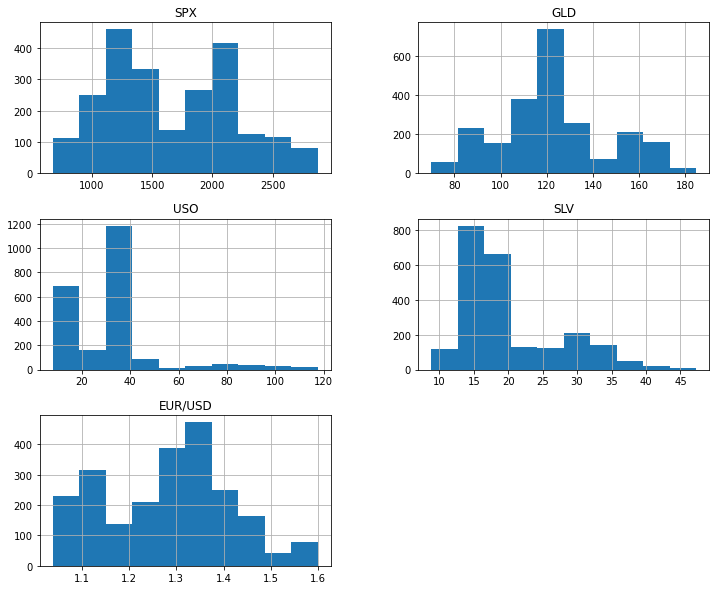

In [18]:
#Plotting histogram to visualise column distribution
df.hist(figsize=(12,10));

<AxesSubplot:>

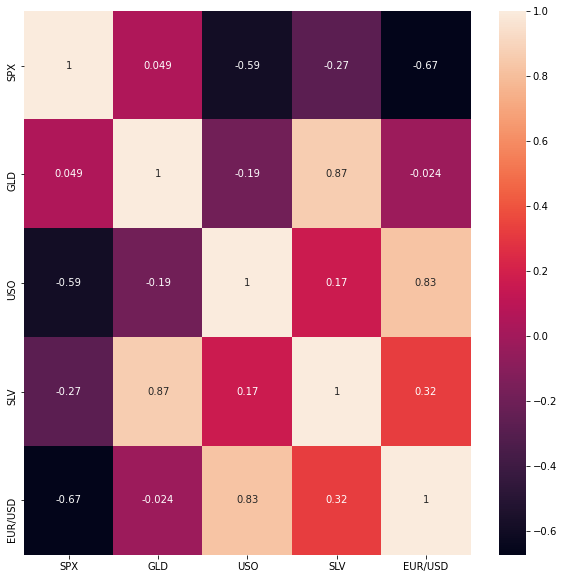

In [21]:
#Correlation
plt.figure(figsize=(10,10))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='rocket')

Correlation Matrix shows Strong positive correlation between gold and silver

In [22]:
#Gold correlation with other features
corr['GLD'].sort_values(ascending=False)

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64

C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

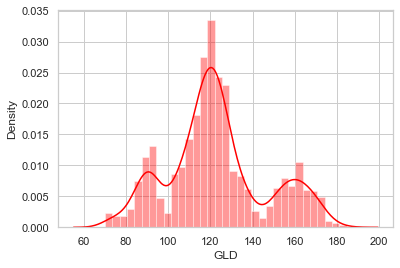

In [24]:
#Plot gold Distplot for better visualisation
sns.set_theme(style='whitegrid')
sns.distplot(df['GLD'],color='red')

# Train-test-split and ML algorithms

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Y = df['GLD'] 
X = df.drop(['Date', 'GLD'], axis = 1)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=99)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape 

((1832, 4), (1832,), (458, 4), (458,))

In [7]:
model = RandomForestRegressor(n_estimators=100)
# fit model on training data 
model.fit (X_train, Y_train)
# get model prediction on test data
Y_pred = model.predict(X_test)

In [9]:
from sklearn import metrics
MSE = metrics.mean_squared_error(Y_test, Y_pred)
MAE = metrics.mean_absolute_error(Y_test, Y_pred)
r_2 = metrics.r2_score(Y_test, Y_pred)
print (f'Mean Squared Error = {MSE}')
print (f'Mean Absolute Error = {MAE}')
print (f'R-Squared error = {r_2}')

Mean Squared Error = 4.527558321511367
Mean Absolute Error = 1.2226984289519616
R-Squared error = 0.9909473539570794


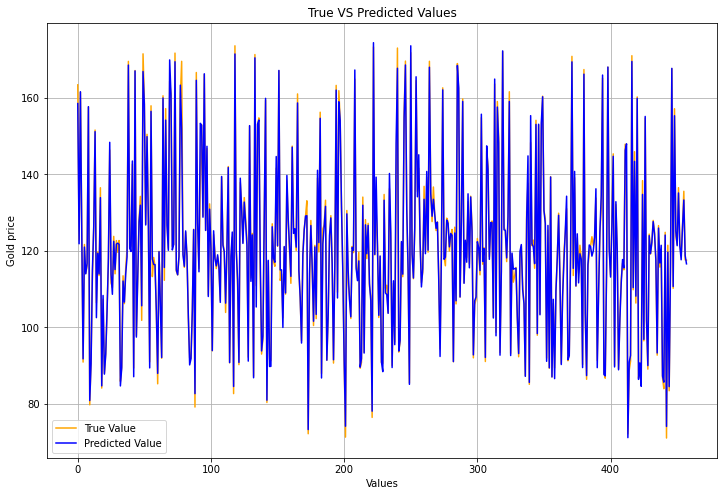

In [11]:
# plot prediction VS original data
Y_test = list(Y_test)
plt.figure(figsize=(12, 8))
plt.plot(Y_test, color = 'orange', label = 'True Value')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Value')
plt.legend()
plt.xlabel('Values')
plt.ylabel('Gold price')
plt.title('True VS Predicted Values')
plt.grid()
plt.show();